<a href="https://colab.research.google.com/github/agenorrneto/prs_plots/blob/master/gr%C3%A1ficos_prs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import random
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

##Random numbers (training)

In [2]:
random.randint(100)

65

In [3]:
z = random.randint(100, size=10)
print(z)

[63 14 99 65 49 60 31 14 85 51]


In [4]:
z_bi = random.randint(100, size=(10, 20))
print(z_bi)

[[71 89  5 68 44 11 37 15 63 71 28  9  4 85 40 26 77 45 80  2]
 [71 52 37 64  7  6 49 76 69 99 74 71 64 51 71 75 59 75 78 87]
 [99  3 80 40 64 80 47 70 46 31 85 36 52 90 90 41 92 57 77 84]
 [ 6 30 99 65 68  3 43 45 46 20 19 41  3 12 68 40 88 46  0  4]
 [75 13 81 67 62 99  0 96  1 95 41  0 21 14 29 91 59 79 59 83]
 [ 4 34 94 15 65 58 11 86 29 32 98 10 70  5 73 94 61 95 57 77]
 [25 57 26 93 82 62 61 96 39 60 92 66  4 89 51 15 20 64 26 75]
 [57  9 89 82 28 31 68 95 89 85 87 35 58 92 12 17 90  9 85 47]
 [43 30 84 66 48 68 86 84 52 97 19 20 49 30  8 62  5 74 44 52]
 [58 29 48 68 71 17 83 57 45  2 11 29 56 63 85 15 41 66 50 31]]


In [5]:
a = random.rand(10)
print(a)

[0.5174873  0.59644641 0.74239633 0.69876083 0.67364422 0.69463052
 0.44792596 0.29712287 0.74958773 0.1778714 ]


##Generating random data

In [6]:
#Primeiramente, precisamos gerar dados simulados para a plotagem dos gráficos. Aqui é gerado um dataframe com duas colunas: uma coluna com valores de IMC
# e outras com valores de PRS (polygenic risk score)
prs_data = pd.DataFrame({"imc": random.normal(27.0, 3, size=1000),
                         "prs": random.normal(2.5, 1, size=1000)})

In [7]:
prs_data

,imc,prs
0,25.581212,1.190600
1,22.889882,3.456974
2,23.894118,1.523977
3,28.758104,3.789539
4,29.613595,3.229053
...,...,...
995,30.377202,1.890787
996,25.898121,3.177605
997,27.086962,2.858559
998,28.444945,2.101281


In [8]:
#Agora, também precisamos categorizar os dados de IMC em pessoas em situação normal e em obesidade
bins_imc = [0, 30, np.inf]
names = ["Normal", "Obesidade"]

prs_data["imc_cat"] = pd.cut(prs_data["imc"], bins=bins_imc, labels=names)

In [9]:
prs_data.imc_cat.value_counts()

Normal       855
Obesidade    145
Name: imc_cat, dtype: int64

In [10]:
#Em alguns gráficos, a amostra será dividida em quantis. Dessa forma, aqui, utilizando a função qcut do pandas, separamos a amostra
# de PRSs em quantis de tamanhos desiguais, concentrando os maiores PRSs nos últimos quantis.
prs_data["prs_quantile"] = pd.qcut(prs_data["prs"], q=[0, 0.10, 0.20, 0.40, 0.60, 0.80, 0.90, 0.95, 0.99, 1.0], labels=["(0, 0.1]", "(0.1, 0.2]", "(0.2, 0.4]", "(0.4, 0.6]", "(0.6, 0.8]",
                                                        "(0.8, 0.9]", "(0.9, 0.95]", "(0.95, 0.99]", "(0.99, 1.0]"])

In [11]:
prs_data

,imc,prs,imc_cat,prs_quantile
0,25.581212,1.190600,Normal,"(0, 0.1]"
1,22.889882,3.456974,Normal,"(0.8, 0.9]"
2,23.894118,1.523977,Normal,"(0.1, 0.2]"
3,28.758104,3.789539,Normal,"(0.9, 0.95]"
4,29.613595,3.229053,Normal,"(0.6, 0.8]"
...,...,...,...,...
995,30.377202,1.890787,Obesidade,"(0.2, 0.4]"
996,25.898121,3.177605,Normal,"(0.6, 0.8]"
997,27.086962,2.858559,Normal,"(0.6, 0.8]"
998,28.444945,2.101281,Normal,"(0.2, 0.4]"


In [12]:
prs_data.prs_quantile.unique()

['(0, 0.1]', '(0.8, 0.9]', '(0.1, 0.2]', '(0.9, 0.95]', '(0.6, 0.8]', '(0.4, 0.6]', '(0.2, 0.4]', '(0.99, 1.0]', '(0.95, 0.99]']
Categories (9, object): ['(0, 0.1]' < '(0.1, 0.2]' < '(0.2, 0.4]' < '(0.4, 0.6]' ... '(0.8, 0.9]' <
                         '(0.9, 0.95]' < '(0.95, 0.99]' < '(0.99, 1.0]']

In [13]:
prs_data["prs_quantile"] = prs_data["prs_quantile"].astype('str')

In [14]:
prs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   imc           1000 non-null   float64 
 1   prs           1000 non-null   float64 
 2   imc_cat       1000 non-null   category
 3   prs_quantile  1000 non-null   object  
dtypes: category(1), float64(2), object(1)
memory usage: 24.7+ KB


In [15]:
fig = px.strip(prs_data, x="prs_quantile", y="imc", color="imc_cat", stripmode="overlay", category_orders={"prs_quantile": ["(0, 0.1]", "(0.1, 0.2]", "(0.2, 0.4]", "(0.4, 0.6]", "(0.6, 0.8]",
                                                        "(0.8, 0.9]", "(0.9, 0.95]", "(0.95, 0.99]", "(0.99, 1.0]"]})
fig.update_xaxes(tickangle=45)
fig.show()

##Generating random data (ideal PRS)

In [16]:
#Aqui será gerado uma amostra de IMCs e PRSs onde os valores de escore poligẽnico de fato aumentam com o IMC, isto é, o escore "funciona" bem
prs_good = pd.DataFrame({"imc": random.normal(27.0, 1, size=600),
                         "prs": random.normal(2.5, 0.3, size=600)})

In [17]:
prs_good

,imc,prs
0,26.771339,2.969399
1,26.248825,2.317024
2,27.399613,2.475938
3,27.665438,2.635983
4,27.206458,1.449847
...,...,...
595,25.303245,2.769119
596,26.036651,2.810287
597,25.594156,2.327428
598,26.801611,2.495980


In [18]:
prs_good_2 = pd.DataFrame({"imc": random.normal(31.0, 0.5, size=400),
                         "prs": random.normal(5.0, 0.01, size=400)})

In [19]:
prs_good_2

,imc,prs
0,31.172862,4.994767
1,30.878297,5.023833
2,30.206822,5.006104
3,30.563029,5.008682
4,30.762283,4.988668
...,...,...
395,30.722991,5.013562
396,30.512297,4.993067
397,30.693327,4.999579
398,30.719898,4.987760


In [20]:
prs_good_of = prs_good_2.append(prs_good)

<ipython-input-20-084eae14aa20>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [21]:
bins_imc = [0, 30, np.inf]
names = ["Normal", "Obesidade"]

prs_good_of["imc_cat"] = pd.cut(prs_good_of["imc"], bins=bins_imc, labels=names)

In [22]:
prs_good_of.imc_cat.value_counts()

Normal       615
Obesidade    385
Name: imc_cat, dtype: int64

In [23]:
prs_good_of["prs_quantile"] = pd.qcut(prs_good_of["prs"], q=[0, 0.10, 0.20, 0.40, 0.60, 0.80, 0.90, 0.95, 0.99, 1.0], labels= ["(0, 0.1]", "(0.1, 0.2]", "(0.2, 0.4]", "(0.4, 0.6]", "(0.6, 0.8]",
                                                        "(0.8, 0.9]", "(0.9, 0.95]", "(0.95, 0.99]", "(0.99, 1.0]"])

In [24]:
prs_good_of.prs_quantile.unique()

['(0.6, 0.8]', '(0.99, 1.0]', '(0.8, 0.9]', '(0.9, 0.95]', '(0.95, 0.99]', '(0.4, 0.6]', '(0.1, 0.2]', '(0.2, 0.4]', '(0, 0.1]']
Categories (9, object): ['(0, 0.1]' < '(0.1, 0.2]' < '(0.2, 0.4]' < '(0.4, 0.6]' ... '(0.8, 0.9]' <
                         '(0.9, 0.95]' < '(0.95, 0.99]' < '(0.99, 1.0]']

In [25]:
fig = px.strip(prs_good_of, x="prs_quantile", y="imc", color="imc_cat", stripmode="overlay",  category_orders={"prs_quantile": ["(0, 0.1]", "(0.1, 0.2]", "(0.2, 0.4]", "(0.4, 0.6]", "(0.6, 0.8]",
                                                        "(0.8, 0.9]", "(0.9, 0.95]", "(0.95, 0.99]", "(0.99, 1.0]"]})

fig.update_xaxes(tickangle=45)
fig.show()

In [26]:
fig.write_html("bmi_strata_plot.html")

## BMI per quantile (boxplot)

In [27]:
#Neste gráfico, os valores de PRS são dividios em 20 quantis (eixo x) e, no eixo y, os valores de IMC são plotados no formato boxplot.
#PRSs com bom desempenho para IMC teriam os valores de IMC aumentando de acordo com os quantis
labels = [f"{n}" for n in range(1, 21)]

prs_data_q20 = prs_data.copy()

prs_data_q20["prs_quantile"] = pd.qcut(prs_data_q20["prs"], q=20, labels=labels)

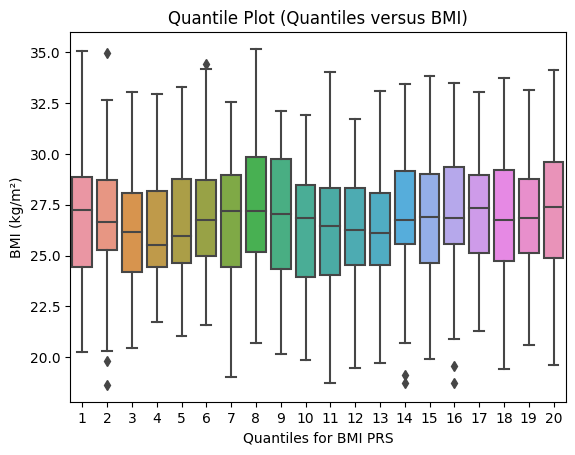

In [28]:
fig = sns.boxplot(data=prs_data_q20, x="prs_quantile", y="imc").set(title='Quantile Plot (Quantiles versus BMI)', xlabel='Quantiles for BMI PRS', ylabel='BMI (kg/m²)')

plt.savefig("quantile_plot.png")

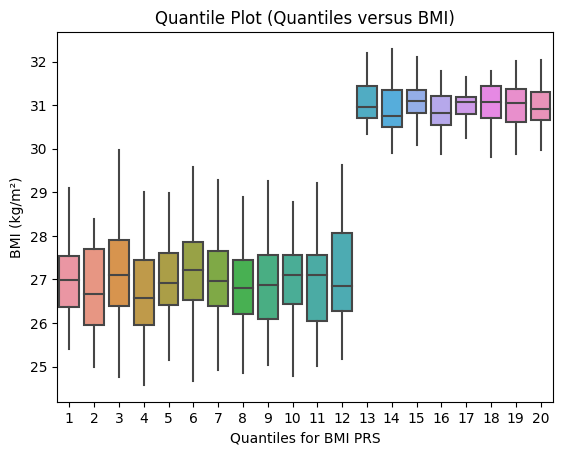

In [29]:
#PRS com um melhor desempenho
labels = [f"{n}" for n in range(1, 21)]

prs_data_q20_good = prs_good_of.copy()

prs_data_q20_good["prs_quantile"] = pd.qcut(prs_data_q20_good["prs"], q=20, labels=labels)

fig = sns.boxplot(data=prs_data_q20_good, x="prs_quantile", y="imc", showcaps=False, showfliers=False).set(title='Quantile Plot (Quantiles versus BMI)', xlabel='Quantiles for BMI PRS', ylabel='BMI (kg/m²)')

plt.savefig("quantile_plot_2.png")

## Prevalence of obesity per quantile 

In [30]:
#Os valores de PRS também podem ser comparados com a prevalência de obesidade naquele quantil
prs_data

,imc,prs,imc_cat,prs_quantile
0,25.581212,1.190600,Normal,"(0, 0.1]"
1,22.889882,3.456974,Normal,"(0.8, 0.9]"
2,23.894118,1.523977,Normal,"(0.1, 0.2]"
3,28.758104,3.789539,Normal,"(0.9, 0.95]"
4,29.613595,3.229053,Normal,"(0.6, 0.8]"
...,...,...,...,...
995,30.377202,1.890787,Obesidade,"(0.2, 0.4]"
996,25.898121,3.177605,Normal,"(0.6, 0.8]"
997,27.086962,2.858559,Normal,"(0.6, 0.8]"
998,28.444945,2.101281,Normal,"(0.2, 0.4]"


In [31]:
prs_data.groupby(["prs_quantile", "imc_cat"]).size()

prs_quantile  imc_cat  
(0, 0.1]      Normal        83
              Obesidade     17
(0.1, 0.2]    Normal        91
              Obesidade      9
(0.2, 0.4]    Normal       167
              Obesidade     33
(0.4, 0.6]    Normal       175
              Obesidade     25
(0.6, 0.8]    Normal       171
              Obesidade     29
(0.8, 0.9]    Normal        87
              Obesidade     13
(0.9, 0.95]   Normal        43
              Obesidade      7
(0.95, 0.99]  Normal        30
              Obesidade     10
(0.99, 1.0]   Normal         8
              Obesidade      2
dtype: int64

In [32]:
prs_data.groupby(["prs_quantile"]).size()

prs_quantile
(0, 0.1]        100
(0.1, 0.2]      100
(0.2, 0.4]      200
(0.4, 0.6]      200
(0.6, 0.8]      200
(0.8, 0.9]      100
(0.9, 0.95]      50
(0.95, 0.99]     40
(0.99, 1.0]      10
dtype: int64

In [33]:
prevalences_1 = prs_data.groupby(["prs_quantile", "imc_cat"]).size() / prs_data.groupby(["prs_quantile"]).size()

In [34]:
prevalences_1.loc[:, "Obesidade"].reset_index()

,prs_quantile,0
0,"(0, 0.1]",0.170
1,"(0.1, 0.2]",0.090
2,"(0.2, 0.4]",0.165
3,"(0.4, 0.6]",0.125
4,"(0.6, 0.8]",0.145
5,"(0.8, 0.9]",0.130
6,"(0.9, 0.95]",0.140
7,"(0.95, 0.99]",0.250
8,"(0.99, 1.0]",0.200


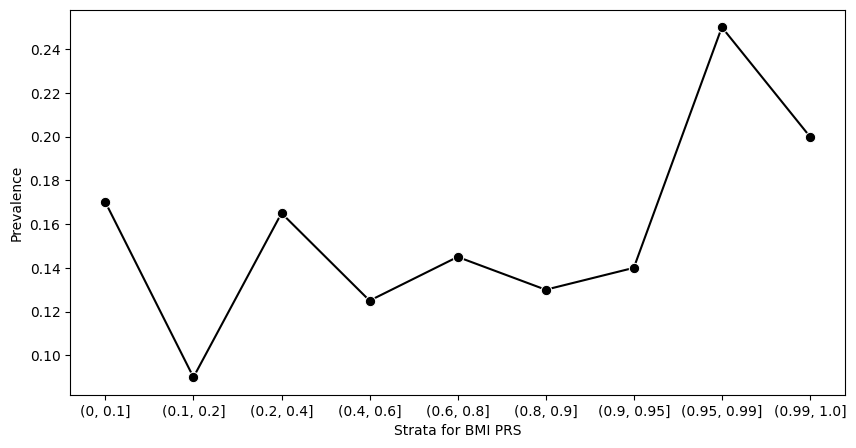

In [35]:
fig = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(prevalences_1.loc[:, "Obesidade"], marker=".", markersize=15, color="black").set( xlabel='Strata for BMI PRS', ylabel='Prevalence')

plt.savefig("prev_per_quantile_good.png")

In [36]:
prevalences_2 = prs_good_of.groupby(["prs_quantile", "imc_cat"]).size() / prs_good_of.groupby(["prs_quantile"]).size()

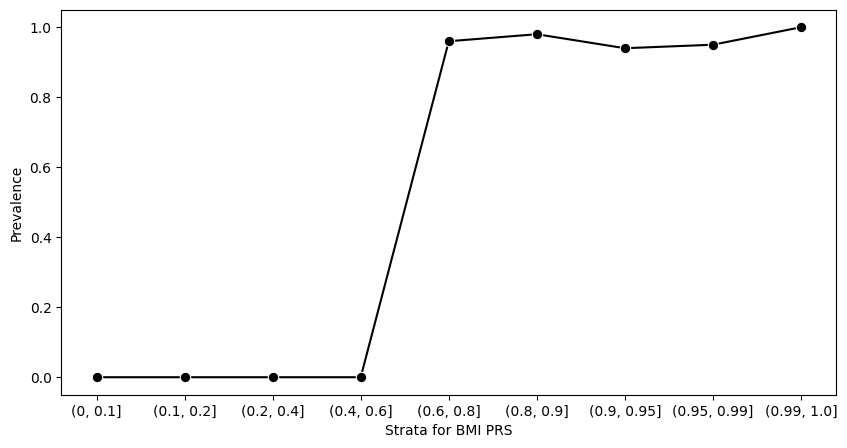

In [37]:
fig = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(prevalences_2.loc[:, "Obesidade"], marker=".", markersize=15, color="black").set( xlabel='Strata for BMI PRS', ylabel='Prevalence')
plt.savefig("prev_per_quantile_bad.png")